# Generador de l'ecuyer

Imagina que quieres crear una lista de números aleatorios, pero no tienes ningún dado o moneda para tirar y obtener un resultado aleatorio. En su lugar, puedes usar un programa de ordenador que genera números "pseudoaleatorios". Estos números no son realmente aleatorios, pero pueden parecerlo si se hacen correctamente.

El generador de L'Ecuyer es una manera de generar números pseudoaleatorios. Utiliza dos fórmulas matemáticas para producir una lista de números que parecen aleatorios. Las fórmulas son como un "juego matemático" que usa dos números especiales llamados "semillas" para crear una serie de números. Cada número generado se calcula a partir del número anterior.

Los generadores lineales congruentes son un tipo de fórmula que se utiliza en el generador de L'Ecuyer. Una fórmula lineal congruente es como un "truco matemático" que toma un número inicial (la semilla), lo multiplica por otro número (a), le suma otro número (c) y toma el resultado módulo de un tercer número (m). La fórmula se escribe así:

Xn+1 = (aXn + c) % m

En esta fórmula, Xn es el número anterior de la serie, Xn+1 es el siguiente número, a, c y m son números especiales que se eligen cuidadosamente para obtener una serie de números pseudoaleatorios que parezcan aleatorios.

El generador de L'Ecuyer utiliza dos fórmulas lineales congruentes juntas para generar una serie de números. Cada fórmula tiene su propia semilla, a, c y m. Cuando las dos fórmulas se combinan, se crea una secuencia de números que parecen aleatorios.

El generador de L'Ecuyer es una herramienta matemática que usa dos fórmulas llamadas generadores lineales congruentes para crear una serie de números pseudoaleatorios. Cada fórmula tiene su propia semilla, que es como un número de inicio. Cuando se combinan, las fórmulas crean una serie de números que parecen aleatorios.x

Generador de L'Ecuyer

El generador de L'Ecuyer utiliza dos GLC con parámetros cuidadosamente elegidos para garantizar que la secuencia resultante tenga propiedades estadísticas deseables, como una distribución uniforme y una correlación baja entre los números generados. Además, el generador de L'Ecuyer tiene un periodo largo, lo que significa que puede generar una gran cantidad de números pseudoaleatorios antes de que se repita la secuencia.

La fórmula para el generador de L'Ecuyer es la siguiente:

X[n+1] = (a * X[n] + c) % m

Y[n+1] = (a * Y[n] + c) % m

Z[n+1] = (X[n+1] - Y[n+1]) % m

En esta fórmula, $X_n$ y $Y_n$ son los números anteriores de las dos series de GLC, $a_1$, $a_2$, $c_1$, $c_2$, $m_1$ y $m_2$ son los parámetros cuidadosamente elegidos y $Z_{n+1}$ es el número pseudoaleatorio resultante. La elección de los parámetros se realiza de manera que las secuencias de números generados tengan una buena calidad estadística.

Conclusión
En resumen, el generador de L'Ecuyer es un método para generar números pseudoaleatorios mediante la combinación de dos generadores lineales congruentes, que se basa en la elección cuidadosa de parámetros para garantizar propiedades estadísticas deseables. El generador de L'Ecuyer se utiliza en aplicaciones de simulación y optimización donde se requiere una secuencia de números pseudoaleatorios que parezcan aleatorios.

In [22]:
import pandas as pd
import random
import matplotlib.pyplot as plt

In [24]:
#Creamos la primera columna (i)
col_i = pd.DataFrame({'num': range(1,501)})
col_i

,num
0,1
1,2
2,3
3,4
4,5
...,...
495,496
496,497
497,498
498,499


In [31]:
#Columna 2 (Ui), número aleatorio uniforme entre 0 y 1

ui = [random.uniform(0,1)for i in range(500)]
col_i ['Ui'] = ui
tabla = col_i
tabla

,num,Ui
0,1,0.086349
1,2,0.802766
2,3,0.354060
3,4,0.441465
4,5,0.452968
...,...,...
495,496,0.815726
496,497,0.903942
497,498,0.295804
498,499,0.603580


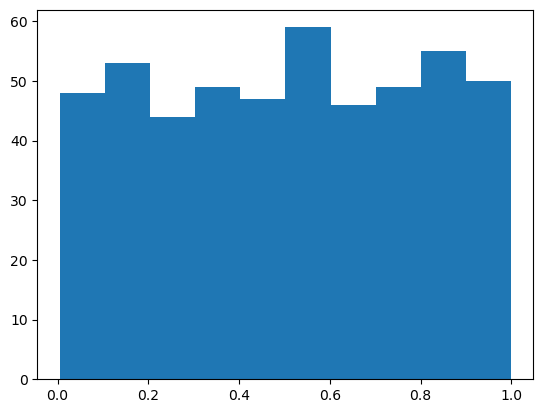

In [32]:
#Revisamos que tan uniforme fue el ejercicio anterior ploteandolo

plt.hist(ui)
plt.show()

In [33]:
#Agregamos columna de limite inferior
lim_inf= 0
tabla['Limite inferior'] = lim_inf
tabla

,num,Ui,Limite inferior
0,1,0.086349,0
1,2,0.802766,0
2,3,0.354060,0
3,4,0.441465,0
4,5,0.452968,0
...,...,...,...
495,496,0.815726,0
496,497,0.903942,0
497,498,0.295804,0
498,499,0.603580,0


In [ ]:
#Agregamos el limite superior ahora sí modificando los intervalos
#Serán intervalos de 100

for 